In [1]:
print('Start import')
import socket 
import strax
import straxen
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import datetime
import pandas as pd
print(
f'''Working on {socket.getfqdn()} with the following versions 
and installation paths:
strax
\tv{strax.__version__}\t{str(strax.__path__[0])}
straxen
\tv{straxen.__version__}\t{str(straxen.__path__[0])}
''')
from multihist import Hist1d, Histdd
import time
import itertools
import os

from scipy import stats
from straxen import units
from scipy.optimize import curve_fit

import peaks_utility as psu
import drift_diffusion_utility as ddu
import math

Start import
Working on midway2-0464.rcc.local with the following versions 
and installation paths:
strax
	v0.15.3	/dali/lgrandi/strax/strax/strax
straxen
	v0.18.8	/dali/lgrandi/strax/straxen/straxen



In [2]:
st = straxen.contexts.xenonnt_online()

In [17]:
kr_runs_sr0=['018871', '018869', '018867', '018865', '018863', '018861', '018859', '018856', '018855', '018852', '018851', '018848', '018847', '018844', '018843', '018838', '018836', '018834', '018832', '018830', '018828', '018826', '018824', '018822', '018820', '018816', '018813', '018809', '018808', '018805', '018804', '018801', '018800', '018797', '018796', '018793', '018792', '018789', '018788', '018785', '018784', '018781', '018779', '018777', '018775', '018773', '018771', '018769', '018767', '018765', '018763', '018761', '018759', '018757', '018755', '018753', '018751', '018749', '018747', '018745', '018743', '018737', '018735', '018733', '018731', '018729', '018726', '018725', '018722', '018721', '018718', '018717', '018714', '018713', '018710', '018709', '018706', '018705', '018702', '018701', '018698', '018697', '018694', '018693', '018690', '018689', '018687', '018686', '018684', '018683', '018681', '018680', '018678', '018677', '018675', '018674', '018672', '018671', '018669', '018668', '018666', '018665', '018663', '018662', '018660', '018659', '018657', '018655', '018653', '018651', '018649', '018647', '018645', '018643', '018641', '018637', '018634', '018633', '018630', '018629', '018626', '018625', '018622', '018621', '018618', '018617', '018614', '018612', '018610', '018608', '018606', '018604', '018602', '018600', '018598', '018596', '018594', '018592', '018590', '018588', '018586', '018584', '018582', '018580', '018578', '018576', '018574', '018572', '018570', '018568', '018564', '018562', '018560', '018558', '018556', '018554', '018552', '018550', '018548', '018546', '018544', '018542', '018540', '018537', '018536', '018534', '018532', '018528', '018527', '018525', '018523', '018519', '018517', '018510', '018507', '018506', '018503', '018502', '018499', '018498', '018495', '018494', '018491', '018489', '018487', '018485', '018483', '018481', '018479', '018477', '018475', '018473', '018471', '018469', '018467', '018465', '018463', '018460', '018459', '018456', '018455', '018452', '018451', '018448', '018447', '018444', '018443', '018440',
             '018975', '018973', '018971', '018969', '018967', '018965', '018963', '018961', '018959', '018957', '018955', '018953', '018951', '018949', '018947', '018945', '018943', '018941', '018939', '018937', '018935', '018933', '018930', '018929', '018926', '018925', '018922', '018921', '018918', '018917', '018914', '018913', '018910', '018908', '018906', '018904', '018902', '018900']

Drift velocity = 0.679~mm/$\mu$s
Diffusion constant = 45.87 +/- 0.13 cm$^2$/s 


(18871,
 0.6785892524588668,
 0.0030970506880411072,
 45.866519714985934,
 0.12962286609573231,
 2191.0821643286577,
 2.7185929648241203,
 5.296482412060302,
 array([4.58665197e-05, 2.32486544e-02]),
 array([1.29622866e-07, 2.31385570e+05]))

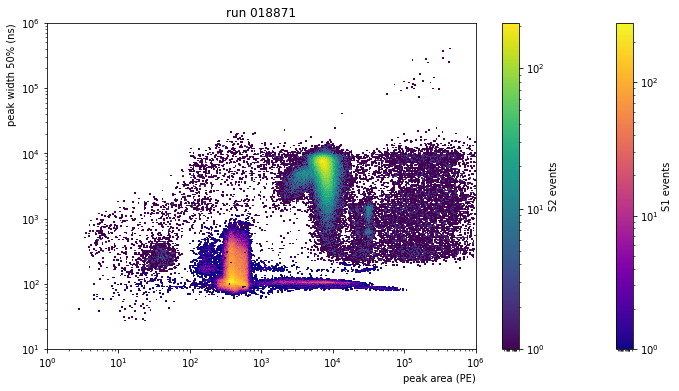

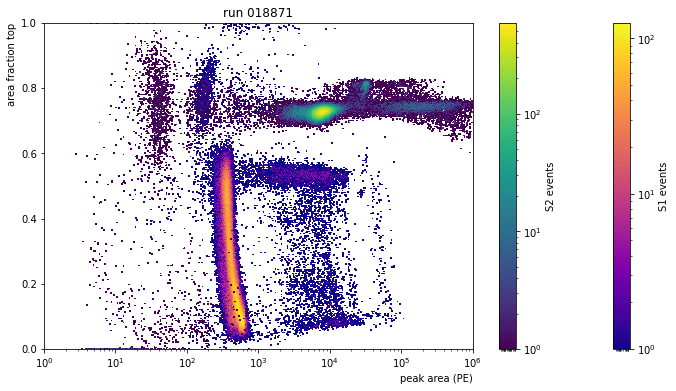

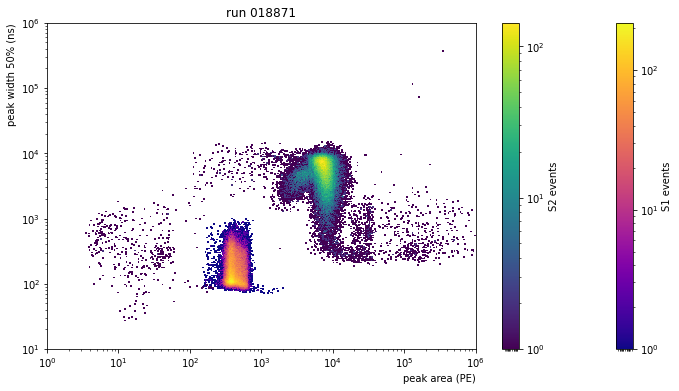

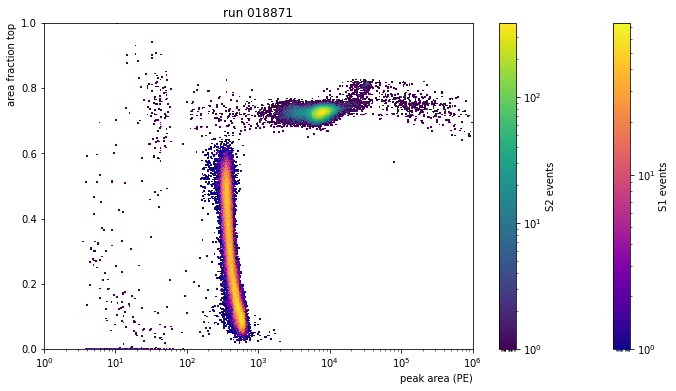

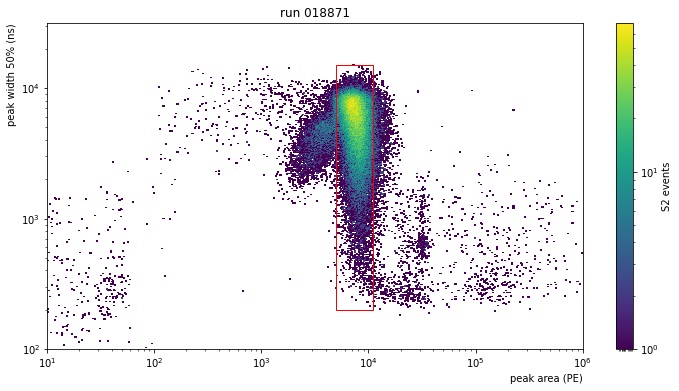

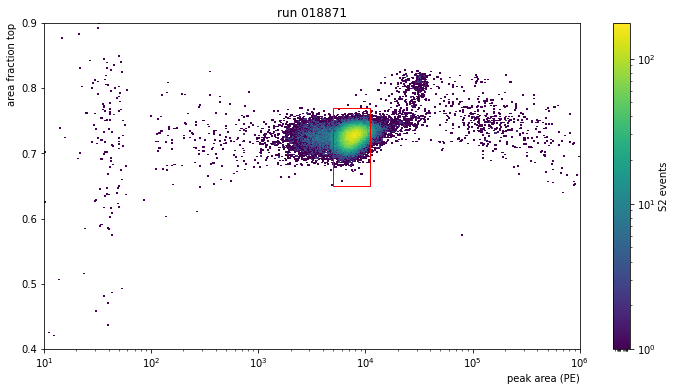

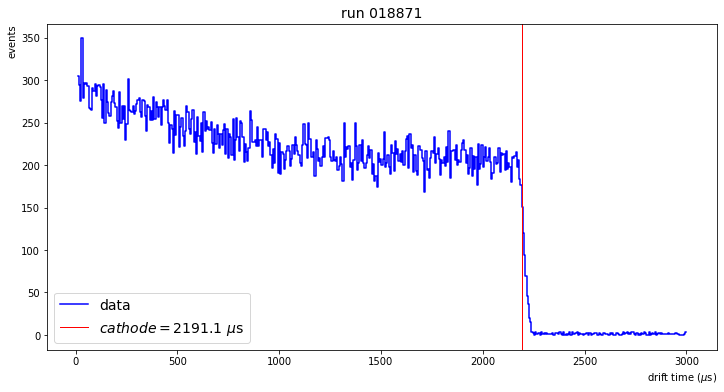

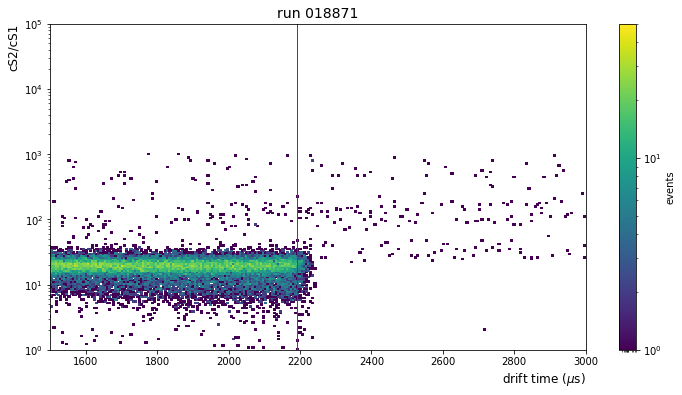

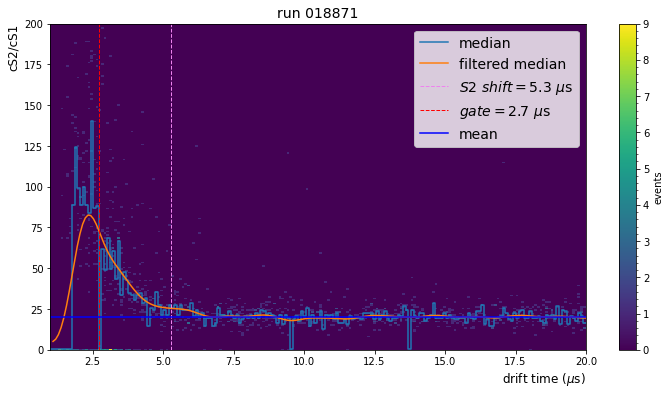

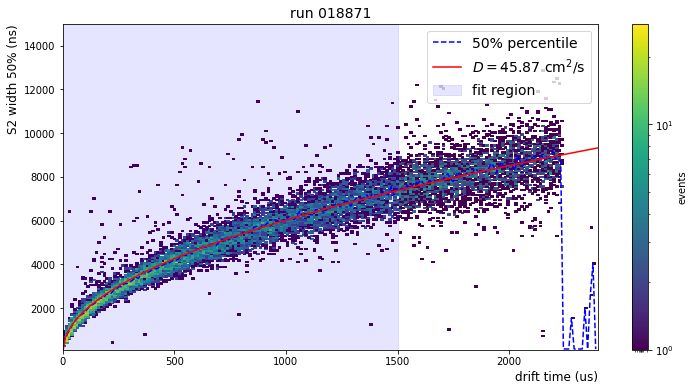

In [18]:
ddu.diffusion_analysis_kr(st, run_kr='018871', area_cut=(5e3,1.1e4), radial_cut = 60, plot = True )

Drift velocity = 0.677~mm/$\mu$s
Diffusion constant = 45.64 +/- 0.14 cm$^2$/s 


(18975,
 0.6767951682487341,
 0.0030804384493507333,
 45.635968733252845,
 0.14132993801879773,
 2197.074148296593,
 2.909547738693467,
 4.914572864321608,
 array([ 4.56359687e-05, -2.11752435e-02]),
 array([1.41329938e-07, 4.08892860e+05]))

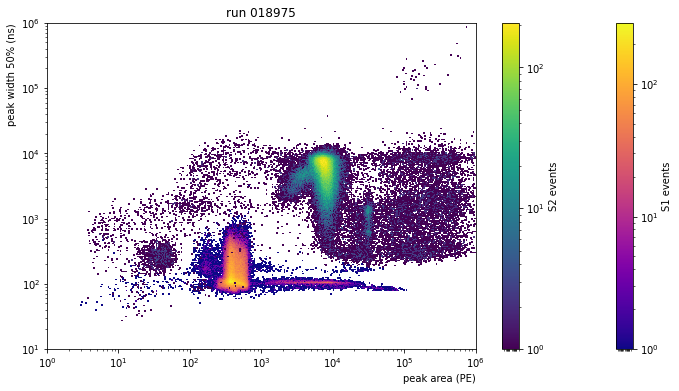

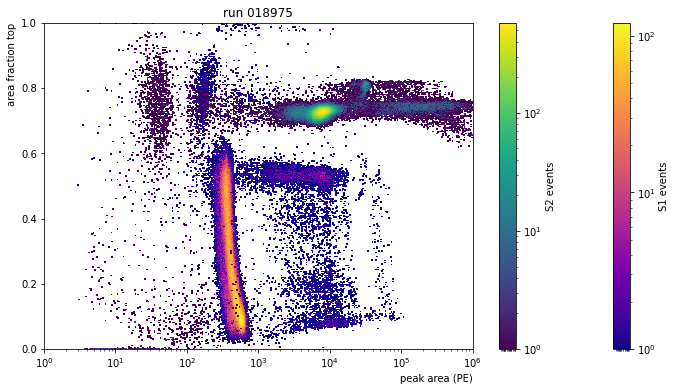

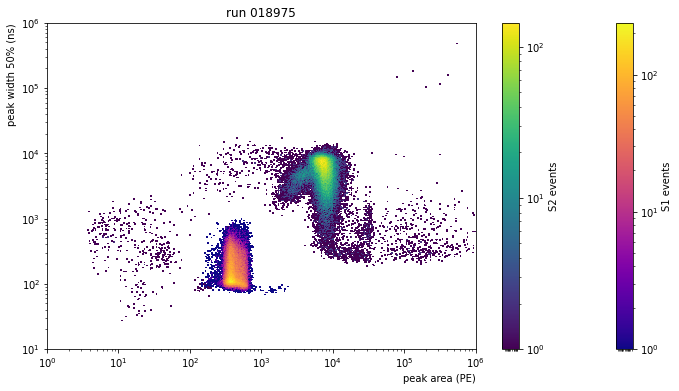

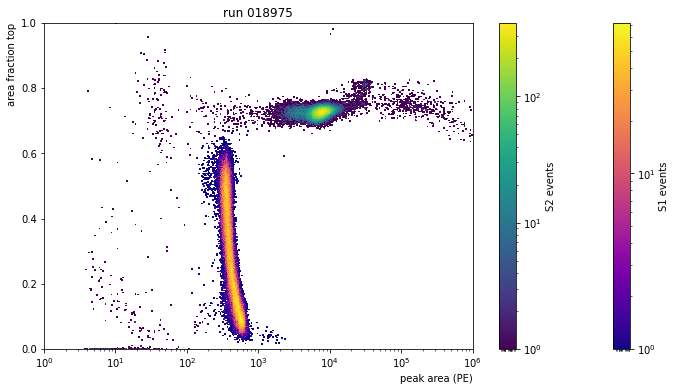

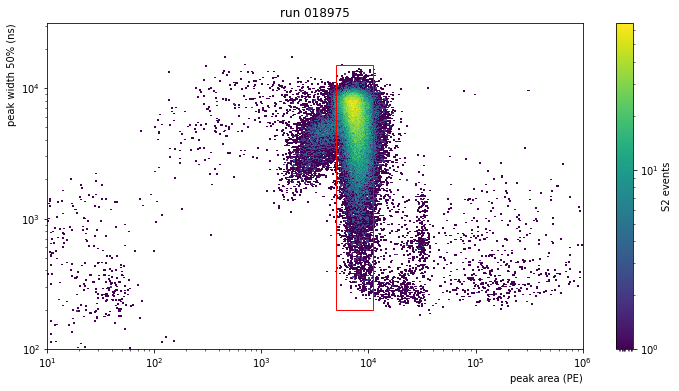

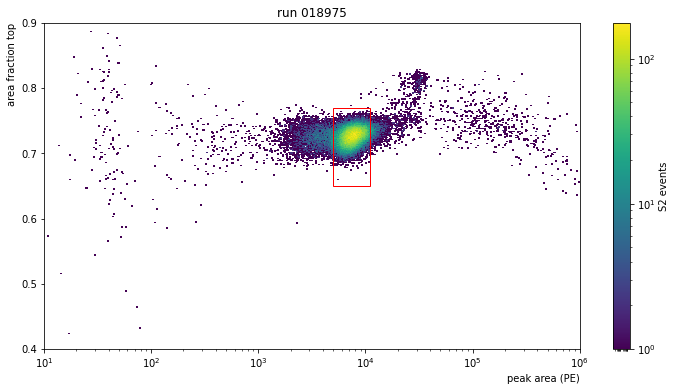

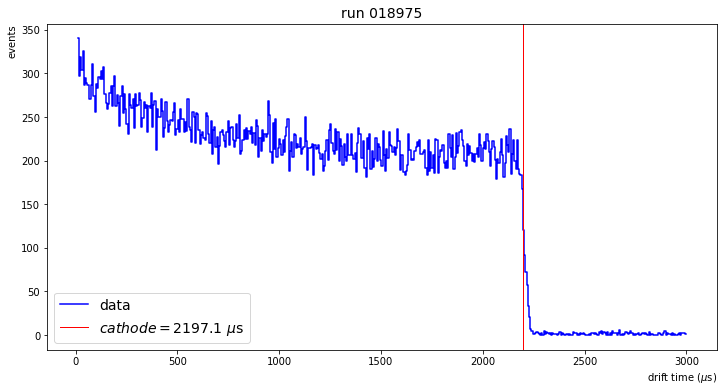

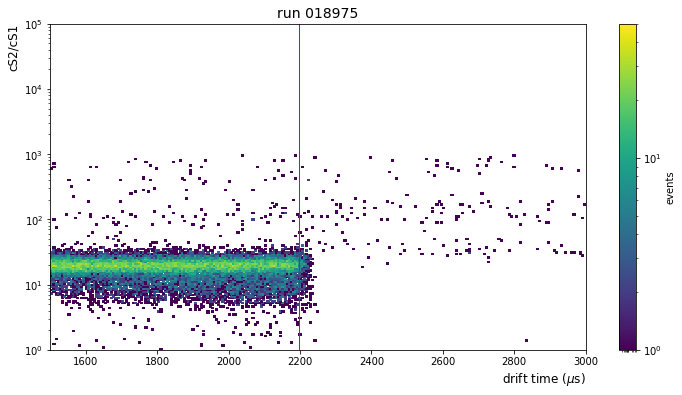

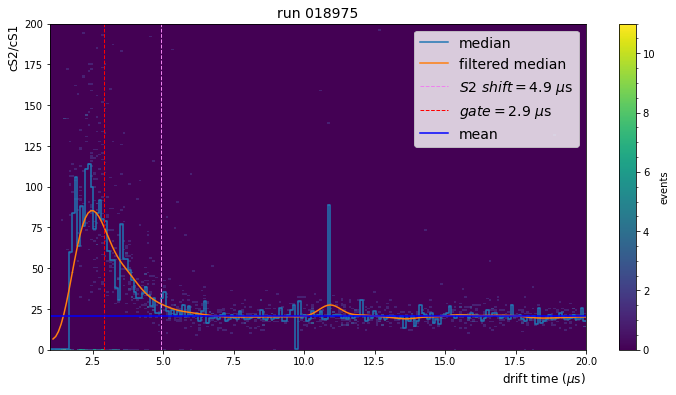

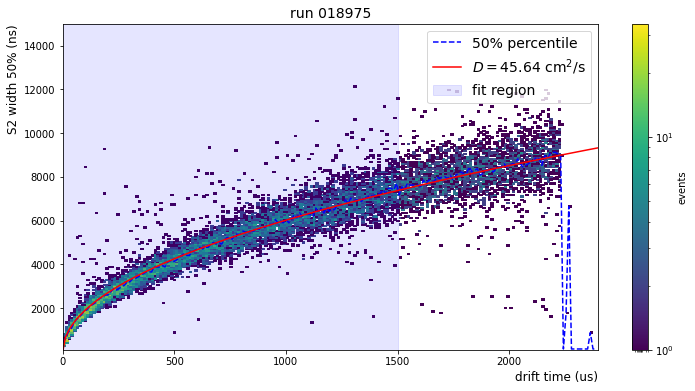

In [21]:
ddu.diffusion_analysis_kr(st, run_kr='018975', area_cut=(5e3,1.1e4), radial_cut = 60, plot = True)

In [22]:
def kr_drift_diffusion_analysis(kr_runs):
    nn = len(kr_runs)
    runs, vd, vd_err = np.zeros(nn), np.zeros(nn), np.zeros(nn)
    d, d_err, w0, w0_err = np.zeros(nn), np.zeros(nn), np.zeros(nn), np.zeros(nn)
    cc, gg, ss = np.zeros(nn), np.zeros(nn), np.zeros(nn)
    for i, run in enumerate(kr_runs):
        runs[i], vd[i], vd_err[i], d[i], d_err[i], cc[i], gg[i], ss[i], par, par_err = ddu.diffusion_analysis_kr(st,run, area_cut=(4e3,1.2e4))
        w0[i], w0_err[i] = par[1]/units.ns, par_err[1]/units.ns
        print(f'run {run}, vD = {vd[i]:.3f} +/- {vd_err[i]:.3f} mm/us, D = {d[i]:.2f} +/- {d_err[i]:.2f} cm2/s, w0 = {w0[i]:.2f} +/- {w0_err[i]:.2f} ns')
    # plot diffusion vs runs
    plt.figure(figsize=(12,6))
    plt.xlabel("run", ha='right', x=1,fontsize=14)
    plt.ylabel("diffusion constant (cm$^2$/s)", ha='right', y=1,fontsize=14)
    plt.errorbar(runs, d, yerr = d_err, fmt='s',c='b',label='diffusion constant')
    mean1 = d[d>0].mean()
    std1 = d[d>0].std()/np.sqrt(np.size(d))+d_err[d>0].mean()
    plt.axhline(mean1,color='r',label=f'$D = {mean1:.2f} \pm {std1:.2f}$ cm$^2$/s')
    #plt.xticks(rint)
    #plt.ylim(41,45)
    plt.legend(fontsize=14)
    
    ### cathode drop-off
    plt.figure(figsize=(12,6))
    plt.xlabel("run", ha='right', x=1,fontsize=14)
    plt.ylabel("cathode drift time ($\mu$s)", ha='right', y=1,fontsize=14)
    plt.errorbar(runs,cc,yerr=10,fmt='s',color='b',label='cathode drift time')
    cm1, cs1 = cc.mean(), cc.std()/np.sqrt(np.size(cc))
    plt.axhline(cm1, color='r',label=f'$cathode = {cm1:.1f} \pm {cs1:.1f}$ mm/$\mu$s')
    #plt.ylim(2320,2400)
    #plt.xticks(rint)
    plt.legend(fontsize=14)

    ### gate drift time
    plt.figure(figsize=(12,6))
    plt.xlabel("run", ha='right', x=1,fontsize=14)
    plt.ylabel("gate drift time ($\mu$s)", ha='right', y=1,fontsize=14)
    plt.errorbar(runs,gg,yerr=1,fmt='s',color='g',label='gate drift time')
    gm1, gs1 = gg[gg>0].mean(), (gg[gg>0].max()-gg[gg>0].min())/2
    plt.axhline(gm1,color='r',label=f'$gate = {gm1:.1f} \pm {gs1:.1f}$ mm/$\mu$s')
    plt.legend(fontsize=14)
    #plt.xticks(rint)
    #plt.ylim(1,5)

    ### S2 shift time
    plt.figure(figsize=(12,6))
    plt.xlabel("run", ha='right', x=1,fontsize=14)
    plt.ylabel("S2 shifted time ($\mu$s)", ha='right', y=1,fontsize=14)
    plt.errorbar(runs,ss,yerr=1,fmt='s',color='violet',label='S2 shifted time')
    sme1, sst1 = ss[ss>0].mean(), (ss[ss>0].max()-ss[ss>0].min())/2
    plt.axhline(sme1,color='r',label=f'$S2 shift = {sme1:.1f} \pm {sst1:.1f}$ mm/$\mu$s')
    plt.legend(fontsize=14)
    #plt.xticks(rint)
    #plt.ylim(3,8)

    # drift velocity
    plt.figure(figsize=(12,6))
    plt.xlabel("run", ha='right', x=1,fontsize=14)
    plt.ylabel("drift velocity (mm/$\mu$s)", ha='right', y=1,fontsize=14)
    plt.errorbar(runs,vd,yerr=vd_err,fmt='s',color='r',label='drift velocity')
    m1 = vd[vd>0].mean()
    s1 = vd[vd>0].std()/np.sqrt(np.size(vd))+vd_err[vd>0].mean()+vd_err[vd>0].mean()
    plt.axhline(m1,color='r',label=f'$v_D = {m1:.3f} \pm {s1:.3f}$ mm/$\mu$s')
    #plt.ylim(0.62,0.64)
    #plt.xticks(rint)
    plt.legend(fontsize=14)
    
    # w0
    ### S2 shift time
    plt.figure(figsize=(12,6))
    plt.xlabel("run", ha='right', x=1,fontsize=14)
    plt.ylabel("w0 (ns)", ha='right', y=1,fontsize=14)
    plt.errorbar(runs,w0,yerr=w0_err,fmt='s',color='g',label='w0')
    w0m, w0s = w0[w0>0].mean(), (w0[w0>0].max()-w0[w0>0].min())/2
    plt.axhline(w0m,color='r',label=f'$w0 = {w0m:.1f} \pm {w0s:.1f}$ ns')
    plt.legend(fontsize=14)
    return mean1, std1, m1, s1, w0m,w0s

run 018871, vD = 0.679 +/- 0.003 mm/us, D = 44.72 +/- 0.09 cm2/s, w0 = 369.14 +/- 46.14 ns
run 018869, vD = 0.675 +/- 0.003 mm/us, D = 44.22 +/- 0.09 cm2/s, w0 = 380.78 +/- 43.54 ns
run 018867, vD = 0.677 +/- 0.003 mm/us, D = 44.53 +/- 0.08 cm2/s, w0 = 361.80 +/- 44.18 ns
run 018865, vD = 0.675 +/- 0.003 mm/us, D = 44.32 +/- 0.09 cm2/s, w0 = 323.48 +/- 53.73 ns
run 018863, vD = 0.681 +/- 0.003 mm/us, D = 45.02 +/- 0.09 cm2/s, w0 = 368.32 +/- 47.19 ns
run 018861, vD = 0.673 +/- 0.003 mm/us, D = 44.06 +/- 0.09 cm2/s, w0 = 351.25 +/- 47.06 ns
run 018859, vD = 0.675 +/- 0.003 mm/us, D = 44.35 +/- 0.08 cm2/s, w0 = 335.42 +/- 43.90 ns
run 018856, vD = 0.677 +/- 0.003 mm/us, D = 44.42 +/- 0.08 cm2/s, w0 = 397.29 +/- 39.74 ns
run 018855, vD = 0.673 +/- 0.003 mm/us, D = 43.96 +/- 0.08 cm2/s, w0 = 330.67 +/- 44.80 ns
run 018852, vD = 0.677 +/- 0.003 mm/us, D = 44.48 +/- 0.08 cm2/s, w0 = 406.97 +/- 39.05 ns
run 018851, vD = 0.675 +/- 0.003 mm/us, D = 44.27 +/- 0.08 cm2/s, w0 = 354.43 +/- 43.91 ns

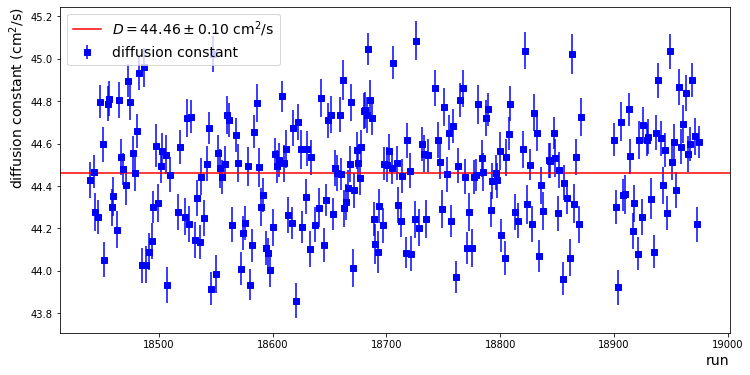

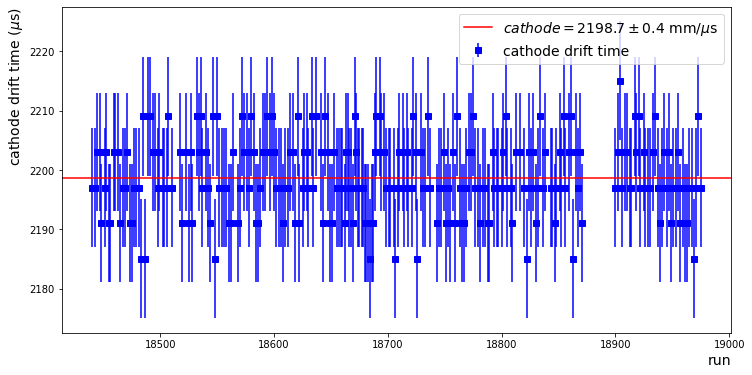

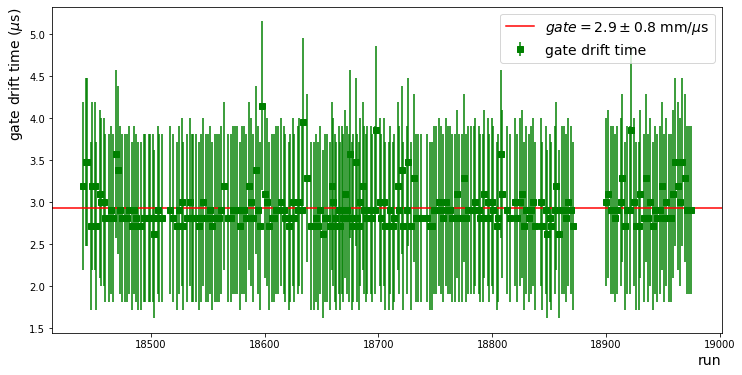

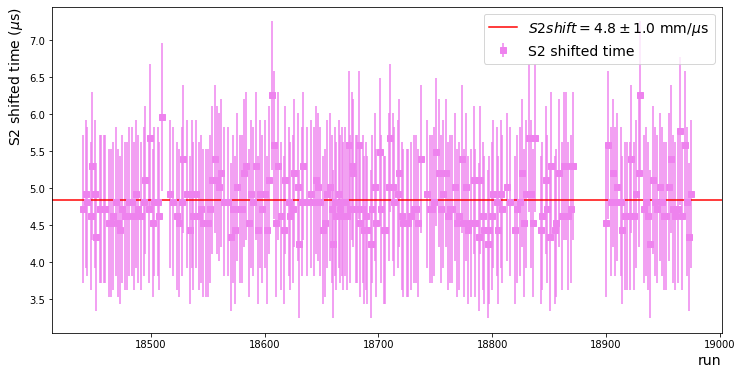

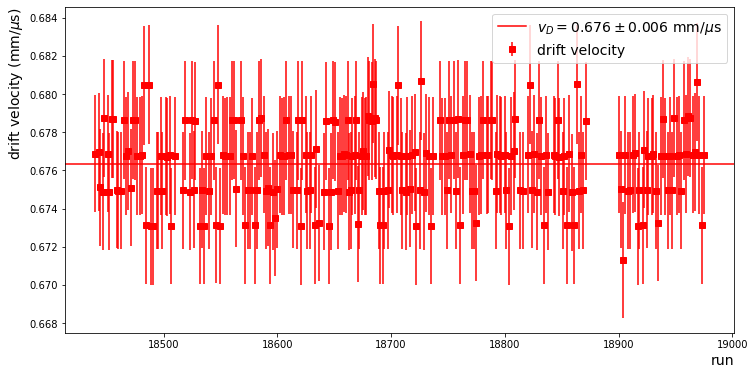

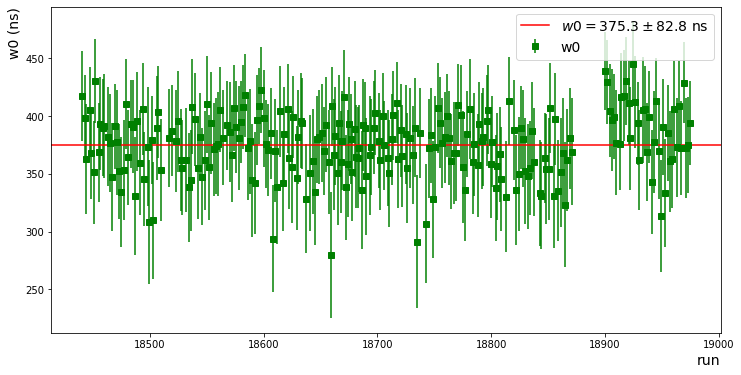

In [20]:
diff1, diff_err1, vd1, vd_err1, w01, w0_err1 = kr_drift_diffusion_analysis(kr_runs_sr0)

In [73]:
def compare_drift_velocity(vd_SR0,vd_SR0_err,ms=5):
    with open("DriftVelocity.txt") as f:
        data = f.read()
    data = data.split('\n')
    ind = [row.split('\t')[0] for row in data]
    dt = [row.split('\t')[1] for row in data]
    dv = [row.split('\t')[2] for row in data]
    dt, dv = np.array(dt, dtype=np.float32), np.array(dv, dtype=np.float32)

    with open("DriftVelocity-Hogenbirk.txt") as f:
        data = f.read()
    data = data.split('\n')
    ff = [row.split(' ')[0] for row in data]
    dd = [row.split(' ')[1] for row in data]
    fe = [row.split(' ')[2] for row in data]
    de = [row.split(' ')[3] for row in data]
    ff, fe = np.array(ff, dtype=np.float32), np.array(fe, dtype=np.float32)
    dd, de = np.array(dd, dtype=np.float32), np.array(de, dtype=np.float32)

    with open("DriftVelocity-Njoya.txt") as f:
        data = f.read()
    data = data.split('\n')
    f_n = [row.split(' ')[0] for row in data]
    d_n = [row.split(' ')[1] for row in data]
    d_n, f_n = np.array(d_n, dtype=np.float32), np.array(f_n, dtype=np.float32)

    with open("DriftVelocity-Gushchin.txt") as f:
        data = f.read()
    data = data.split('\n')
    f_g = [row.split(' ')[0] for row in data]
    d_g = [row.split(' ')[1] for row in data]
    d_g, f_g = np.array(d_g, dtype=np.float32), np.array(f_g, dtype=np.float32)
    
    #vd_nT, vd_nT_err = [0.63,0.631], [0.006,0.003]
    #vd_nTb, vd_nTb_err = [0.596,0.619, 0.622], [0.005,0.003,0.003]
    #field_nT = np.full(len(vd_nT),18.3)
    #field_nTb = np.full(len(vd_nTb),18.3)
    field_1T, vd_1T = [155,134,124,92.8], [1.482,1.456,1.440,1.371]
    field_SR0 = np.full(len(vd_SR0),20.3)
    #plt.figure(figsize=(8,4.5))
    fig, ax = plt.subplots(figsize=(8,4.5))
    plt.xlabel('drift field (V/cm)',ha='right',x=1)
    plt.ylabel('drift velocity (mm/$\mu$s)',ha='right',y=1)
    #plt.xscale('log')
    plt.errorbar(dt,dv,yerr=dv*0.02, fmt='o', label='Miller (1968)')
    plt.errorbar(f_g,d_g,yerr=0, fmt='o', label='Gushchin (1982)')
    plt.errorbar(ff,dd,xerr=fe,yerr=de, fmt='o', label='Hogenbirk (2018)')
    plt.errorbar(f_n,d_n,yerr=0, fmt='o', label='Njoya (2019)')
    plt.errorbar(field_1T, vd_1T, yerr=0,fmt='X',c='black',ms=8,lw=0,label='XENON1T')
    #plt.errorbar(field_nTb,vd_nTb,yerr=vd_nTb_err,fmt='o',c='b',ms=10,lw=0,label='XENONnT - bkg')
    #plt.errorbar(field_nT, vd_nT, yerr=vd_nT_err,fmt='o',c='r',ms=10,lw=0,label='XENONnT - Kr83m')
    plt.errorbar(field_SR0, vd_SR0, yerr=vd_SR0_err,fmt='X',c='b',ms=8,lw=0,label='XENONnT - SR0')
    plt.xlim(0,220)
    plt.ylim(0.15,1.75)
    plt.legend()
    axin = ax.inset_axes([0.34, 0.1, 0.3, 0.38])
    axin.errorbar(dt,dv,yerr=dv*0.02, fmt='o', label='Miller (1968)')
    axin.errorbar(f_g,d_g,yerr=0, fmt='o', label='Gushchin (1982)')
    axin.errorbar(ff,dd,xerr=fe,yerr=de, fmt='o', label='Hogenbirk (2018)')
    axin.errorbar(f_n,d_n,yerr=0, fmt='o', label='Njoya (2019)')
    #axin.errorbar(field_nTb,vd_nTb,yerr=vd_nTb_err,fmt='o',c='b',ms=10,lw=0,label='XENONnT - bkg')
    #axin.errorbar(field_nT, vd_nT, yerr=vd_nT_err,fmt='o',c='r',ms=10,lw=0,label='XENONnT - Kr83m')
    axin.errorbar(field_SR0, vd_SR0, yerr=vd_SR0_err,fmt='X',c='b',ms=8,lw=0,label='XENONnT - SR0')
    axin.set_xlim(16.3,24.3)
    axin.set_ylim(0.5,0.7)
    #axin.set_xticklabels('')
    #axin.set_yticklabels('')
    ax.indicate_inset_zoom(axin)
    plt.savefig('driftvelocity-comparison.png',dpi=600)

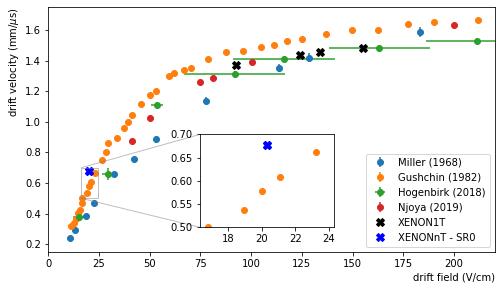

In [74]:
compare_drift_velocity((vd1,vd1),(vd_err1,vd_err1))

In [10]:
def compare_diffusion(d_SR0,d_SR0_err,ms=5):
    diff_nT = [43.0, 42.7]
    diff_nT_err = [0.06, 0.02]
    diff_nTb = [45.3, 49.3, 52.1]
    diff_nTb_err = [0.6, 0.3, 0.3]
    field_nT = np.full(len(diff_nT),18.3)
    field_nTb = np.full(len(diff_nTb),18.3)
    field_SR0 = np.full(len(d_SR0),20.3)
    plt.figure(figsize=(12,6))
    #plt.errorbar(field_nTb,diff_nTb,yerr=diff_nTb_err,fmt='o',ms=ms,color='b',label='bkg - commissioning')
    plt.errorbar(field_nT,diff_nT,yerr=diff_nT_err,fmt='o',ms=ms,color='r',label='Kr83m - commissioning')
    plt.errorbar(field_SR0,d_SR0,yerr=d_SR0_err,fmt='o',ms=ms,color='g',label='Kr83m - SR0')
    plt.xlabel("drift field (V/cm)", ha='right', x=1)
    plt.ylabel("diffusion constant (cm$^2$/s)", ha='right', y=1)
    plt.legend()

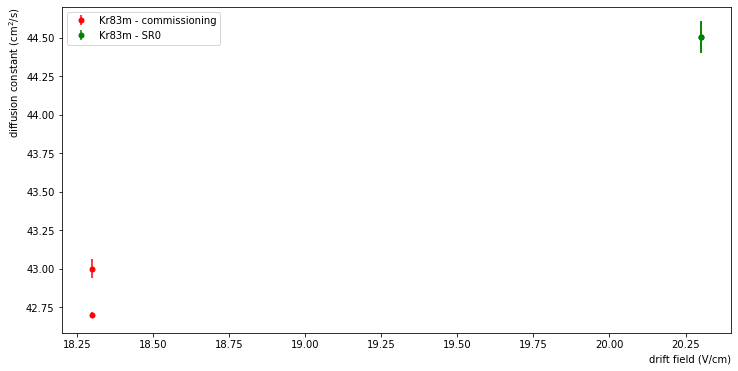

In [11]:
compare_diffusion((diff1,diff1), (diff_err1,diff_err1))

(6.2e-05, 6.9e-05)

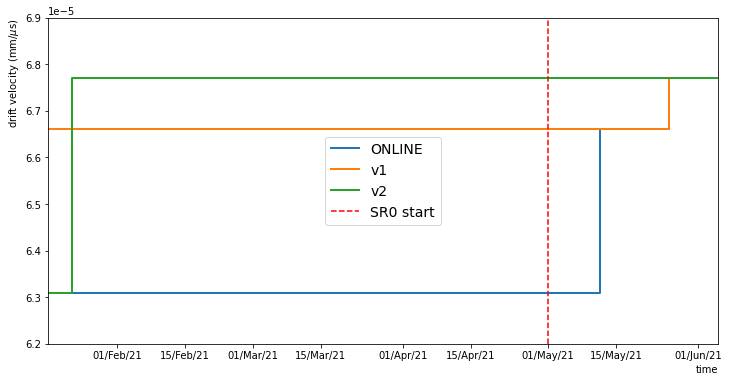

In [68]:
import matplotlib.dates as mdates
times = ['2017-01-01 00:00:00+00:00','2021-01-22 19:04:58+00:00','2021-05-01 00:00:00+00:00',
         '2021-05-11 17:55:00+00:00','2021-05-25 21:20:00+00:00','2021-06-05 00:00:00+00:00',
         '2030-12-31 23:59:59+00:00']
time = pd.to_datetime(times)
v_online = [0.00013325, 6.31e-05, 6.31e-05, 6.31e-05, 6.66e-05, 6.77e-05, 6.77e-05]
v1 = [0.00013325, 6.66e-05, 6.66e-05, 6.66e-05, 6.66e-05, 6.77e-05, 6.77e-05]
v2 = [0.00013325, 6.31e-05, 6.77e-05, 6.77e-05, 6.77e-05, 6.77e-05, 6.77e-05]
fig, ax = plt.subplots(figsize=(12,6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%b/%y'))
plt.plot(time,v_online,lw=2,label='ONLINE',ds='steps')
plt.plot(time,v1,lw=2,label='v1',ds='steps')
plt.plot(time,v2,lw=2,label='v2',ds='steps')
#plt.axvline(time[1],c='black',ls='--',label='commissioning start')
plt.axvline(time[2],c='r',ls='--',label='SR0 start')
plt.xlabel('time',ha='right',x=1)
plt.ylabel('drift velocity (mm/$\mu$s)',ha='right',y=1)
plt.legend(fontsize=14)
plt.xlim(time[1] - np.timedelta64(5, 'D'),time[5])
plt.ylim(6.2e-5,6.9e-5)